In [129]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import geopandas as gpd

In [139]:

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=UserWarning, module="geopandas")



In [131]:
# !pip install geopandas matplotlib


In [2]:
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

# Data Exploring and Importing

In [3]:
innings_path = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/innings.csv'
matches_Path = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/matches.csv'
overvall_detail_path = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/overBallDetails.csv'
over_history_path    = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/overHistory.csv'
players_path ='/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/players.csv'
teams_path   = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/teams.csv'
venues_path  = '/Users/muhammadhassaan/Downloads/atomcamp/EDA /ICC Cricket World Cup/venues.csv'


In [4]:
# df_innings 
# df_matches 
# df_overvall_detail
# df_over_history
# df_players 
# df_teams   
# df_venues#### Players 

In [5]:
# matchers and players will be joined by the teamid1,

In [6]:
df_innings = pd.read_csv(innings_path)
df_matches = pd.read_csv(matches_Path)
df_overvall_detail = pd.read_csv(overvall_detail_path)
df_over_history =  pd.read_csv(over_history_path)
df_players = pd.read_csv(players_path)
df_teams   = pd.read_csv(teams_path)
df_venues  = pd.read_csv(venues_path)

/var/folders/p8/c0fsn_716_z5s9mgvtg4q8mc0000gn/T/ipykernel_2982/3407479919.py:4: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_over_history =  pd.read_csv(over_history_path)


In [7]:

print('inning columns',df_innings.columns)
print()
print('matches columns',df_matches .columns)
print()
print('overs_overall_details columns',df_overvall_detail.columns)
print()
print('history columns',df_over_history.columns)

print()
print('players columns',df_players.columns)

print()
print('teams columns',df_teams.columns)
print()
print('venues columns',df_venues.columns)




inning columns Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns', 'battingTeamId',
       'bowlingTeamId'],
      dtype='object')

matches columns Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       ...
       'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166', 'Unnamed: 167',
       'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170', 'Unnamed: 171',
       'Unnamed: 172', 'Unnamed: 173'],
      dtype='object', length=174)

overs_overall_details columns Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')

history columns Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'ovBalls/6', 'id', 'inningId',

In [8]:
df_venues 

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India
...,...,...,...,...,...
188,100165,Shaheed Veer Narayan Singh International Crick...,NaN,NaN,NaN
189,100178,YS Raja Reddy Stadium,NaN,Kadapa,NaN
190,100187,United Cricket Club Ground,NaN,NaN,NaN
191,100194,Mahinda Rajapaksa International Cricket Stadium,NaN,Sooriyawewa,NaN


In [9]:
df_matches

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,South Africa who chose to bowl,South Africa,19,15,2023-09-09T13:00:00+0200,2023-09-09T21:00:00+0200,1.694260e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,102843,100013,Pakistan who chose to bowl,Pakistan,20,14,2023-09-10T15:00:00+0530,2023-09-10T22:00:00+0530,1.694340e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1697,101735,72,New Zealand who chose to bowl,New Zealand,11,16,2023-09-10T11:00:00+0100,2023-09-10T19:00:00+0100,1.694340e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1698,102844,100013,India who chose to bat,India,14,13,2023-09-12T15:00:00+0530,2023-09-12T22:00:00+0530,1.694510e+12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_teams 

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.0,1988.0
1,11,England,England,ENG,1996.0,2004.0
2,11,England,England,ENG,2229.0,2096.0
3,11,England,England,ENG,2222.0,2226.0
4,11,England,England,ENG,2330.0,2169.0
...,...,...,...,...,...,...
349,572,United States of America,United States of America,USA,430105.0,398513.0
350,572,United States of America,USA,USA,17111.0,17109.0
351,572,United States of America,USA,USA,19127.0,17109.0
352,572,United States of America,United States of America,USA,1159641.0,398513.0


In [11]:
df_players.head(10) #most of cols are categorical data 

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808
5,2084,Max Walker,MHN Walker,Australian,1948-09-12,False,True,NaN,2808
6,2101,Dennis Lillee,D Lillee,Australian,1949-07-18,True,True,FAST_SEAM,2808
7,2039,Ashley Mallett,AA Mallett,Australian,1945-07-13,False,True,NaN,2808
8,2012,Ross Edwards,R Edwards,Australian,1942-12-01,False,True,NaN,2808
9,2076,Rod Marsh,RW Marsh,Australian,1947-11-04,False,False,NaN,2808


In [12]:
df_over_history.info 

<bound method DataFrame.info of         ovNo ovBalls/0 ovBalls/1 ovBalls/2 ovBalls/3 ovBalls/4 ovBalls/5  \
0          1         1         .         .         .       1Wd         .   
1          2         1         .         .         .         1         1   
2          3         1         W         1         .       1Nb         .   
3          4         4       1Nb         .         .         .         4   
4          5         .         .         4         .         .         .   
...      ...       ...       ...       ...       ...       ...       ...   
110406    31         1         .         1         W         .         .   
110407    32         .         .         .         .         .         .   
110408    33         W         4         4         .         4         .   
110409    34         4         2         4         1         .         .   
110410    35         4         .         W       NaN       NaN       NaN   

       ovBalls/6      id  inningId ovBalls/7 ovBalls/8 

In [13]:
df_overvall_detail

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666
...,...,...,...,...,...,...,...,...
157318,157319,5,5,.,1894.0,857.0,False,110410
157319,157320,6,6,.,1894.0,857.0,False,110410
157320,157321,1,1,4,4567.0,17118.0,True,110411
157321,157322,2,2,.,4567.0,17118.0,False,110411


In [14]:
df_innings

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2678,101735,2,5.47,26.5,147,10,161,16,1,True,0,4,0,2,0,16.0,11.0
2678,2679,102844,1,4.33,49.1,213,10,295,12,4,True,0,20,0,1,0,14.0,13.0
2679,2680,102844,2,4.14,41.3,172,10,249,16,1,True,1,8,0,6,0,13.0,14.0
2680,2681,102109,1,6.76,50.0,338,6,300,32,7,False,0,9,0,3,0,19.0,15.0


## Data Cleaning

In [15]:
missing_values = df_matches.isnull().sum() 

In [16]:
# Percentage of missing values in each column
missing_values = df_matches.isnull().sum() 
missing_percentage = (missing_values / len(df_matches)) * 100
print(missing_percentage)


id                0.000000
venueId           0.000000
toss.elected      5.882353
toss.winner       5.882353
team1Id           0.000000
                   ...    
Unnamed: 169    100.000000
Unnamed: 170    100.000000
Unnamed: 171    100.000000
Unnamed: 172    100.000000
Unnamed: 173    100.000000
Length: 174, dtype: float64


In [17]:
# rremove Unnecessary Columns (drops the cols)
df_matches.drop(df_matches.columns[25:175], axis=1, inplace=True)
print("Total columns after dropping:", len(df_matches.columns))
print()

def unnecessary_cols(df,x,y):
    df = df.drop(df.columns[x,y],axis =1, inplace=True)
    return df 


Total columns after dropping: 25



In [18]:
def drop_unnecessary_cols(df,x,y):
    df = df.drop(df.columns[x,y],axis =1, inplace=True)
    return df 

In [19]:
def missing_percentage(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    return missing_percentage

#####  Decide on a Strategy for Each Column with Missing Data 

In [20]:
#  deleting the cols who have 90 -100 % misssing not useful 
df_matches = df_matches.drop(['umpire.name.5','matchStatus','matchStatus_victoryMarginInningsRuns','matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets'], axis=1)
print(missing_percentage(df_matches))

id                      0.000000
venueId                 0.000000
toss.elected            5.882353
toss.winner             5.882353
team1Id                 0.000000
team2Id                 0.000000
matchDate               0.000000
matchEndDate            1.529412
matchDateMs             1.470588
matchEndDateMs         20.117647
matchStatus_outcome     0.647059
matchStatus_text        0.470588
description             0.000000
matchSummary           47.000000
matchType               0.000000
tournamentLabel         0.000000
oversLimit              0.000000
totalBalls             81.352941
isLimitedOvers          0.000000
match.summary          48.352941
dtype: float64


In [21]:
# removes the duplicate
df_matches = df_matches.drop_duplicates() 

## Handling Missing Values

#### Matches 


In [22]:
df_matches = df_matches.drop(['match.summary'], axis=1)

In [23]:
df_matches.columns

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text', 'description',
       'matchSummary', 'matchType', 'tournamentLabel', 'oversLimit',
       'totalBalls', 'isLimitedOvers'],
      dtype='object')

In [24]:
# For categorical columns
df_matches['toss.elected'].fillna(df_matches['toss.elected'].mode()[0], inplace=True)
df_matches['toss.winner'].fillna(df_matches['toss.winner'].mode()[0], inplace=True)

# For numerical columns
# Example: If 'matchEndDateMs' is numerical
df_matches['matchEndDateMs'].fillna(df_matches['matchEndDateMs'].median(), inplace=True)


In [25]:
# mising val Is filled by the imputation method of mean
df_matches['totalBalls'].fillna(df_matches['totalBalls'].mean(), inplace=True)

# Deleting the matchSummary column because it's not useful for analysis
df_matches = df_matches.drop(['matchSummary'], axis=1)

In [26]:
print(missing_percentage(df_matches))

id                     0.000000
venueId                0.000000
toss.elected           0.000000
toss.winner            0.000000
team1Id                0.000000
team2Id                0.000000
matchDate              0.000000
matchEndDate           1.529412
matchDateMs            1.470588
matchEndDateMs         0.000000
matchStatus_outcome    0.647059
matchStatus_text       0.470588
description            0.000000
matchType              0.000000
tournamentLabel        0.000000
oversLimit             0.000000
totalBalls             0.000000
isLimitedOvers         0.000000
dtype: float64


### Innings

In [27]:
print(missing_percentage(df_innings))

id                0.00000
matchId           0.00000
inningsNumber     0.00000
runRate           0.00000
overProgress      0.00000
runs              0.00000
wkts              0.00000
ballsFaced        0.00000
fours             0.00000
sixes             0.00000
allOut            0.00000
noBallRuns        0.00000
wideRuns          0.00000
byeRuns           0.00000
legByeRuns        0.00000
penaltyRuns       0.00000
battingTeamId    77.59135
bowlingTeamId    77.59135
dtype: float64


In [28]:
# betting team ID and bowling team ID are necessary for the analysis
df_innings = df_innings.drop(['battingTeamId', 'bowlingTeamId'], axis=1)


### overallDetails


In [29]:

print('df_overvall_detail % of missing value is not much no need')
print()
print(missing_percentage(df_overvall_detail))

df_overvall_detail % of missing value is not much no need

id                 0.000000
countingBall       0.000000
nonCountingBall    0.000000
score              0.000000
bowlerId           0.064199
facingBatsmanId    0.001907
boundary           0.000000
overHistoryId      0.000000
dtype: float64


### over_history

In [30]:
print(missing_percentage(df_over_history))

ovNo           0.000000
ovBalls/0      0.000000
ovBalls/1      0.223710
ovBalls/2      0.457382
ovBalls/3      0.675657
ovBalls/4      0.911141
ovBalls/5      1.281575
ovBalls/6     86.810191
id             0.000000
inningId       0.000000
ovBalls/7     98.190398
ovBalls/8     99.748213
ovBalls/9     99.959243
ovBalls/10    99.991849
ovBalls/11    99.998189
ovBalls/12    99.999094
ovBalls/13    99.999094
bowlerId      76.697068
dtype: float64


In [31]:
df_over_history.columns

Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'ovBalls/6', 'id', 'inningId', 'ovBalls/7', 'ovBalls/8',
       'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13',
       'bowlerId'],
      dtype='object')

In [32]:
# dropping the column because missing value is too much higher That is 85%
df_over_history = df_over_history.drop(['ovBalls/7', 'ovBalls/8',
       'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12','ovBalls/6', 'ovBalls/13','bowlerId'], axis=1)

In [33]:
print(missing_percentage(df_over_history))

ovNo         0.000000
ovBalls/0    0.000000
ovBalls/1    0.223710
ovBalls/2    0.457382
ovBalls/3    0.675657
ovBalls/4    0.911141
ovBalls/5    1.281575
id           0.000000
inningId     0.000000
dtype: float64


In [34]:
print(missing_percentage(df_over_history))

ovNo         0.000000
ovBalls/0    0.000000
ovBalls/1    0.223710
ovBalls/2    0.457382
ovBalls/3    0.675657
ovBalls/4    0.911141
ovBalls/5    1.281575
id           0.000000
inningId     0.000000
dtype: float64


#### Teams 


In [35]:
print(missing_percentage(df_teams)) # data is okay 

id                0.000000
fullName          0.000000
shortName         0.000000
abbreviation      0.000000
wicketKeeperId    1.977401
captainId         1.694915
dtype: float64


#### Players 


In [36]:
print(missing_percentage(df_players))

id                 0.000000
fullName           0.000000
shortName          0.000000
nationality        2.289786
dateOfBirth        1.943897
rightArmedBowl     0.000000
rightHandedBat     0.000000
bowlingStyle      36.605444
teamId             0.000000
dtype: float64


In [37]:
 # imputation with Most Frequent Value:
mode_bowlingStyle = df_players['bowlingStyle'].mode()[0]
df_players['bowlingStyle'].fillna(mode_bowlingStyle, inplace=True)
print(missing_percentage(df_players))

id                0.000000
fullName          0.000000
shortName         0.000000
nationality       2.289786
dateOfBirth       1.943897
rightArmedBowl    0.000000
rightHandedBat    0.000000
bowlingStyle      0.000000
teamId            0.000000
dtype: float64


#### venues 


In [38]:
print(missing_percentage(df_venues))

id            0.000000
fullName      0.000000
shortName    10.362694
city          4.145078
country      10.362694
dtype: float64


In [39]:
# df_innings 
# df_matches 
# df_overvall_detail
# df_over_history
# df_players 
# df_teams   
# df_venues#### Players 


#### DataTypes


In [40]:
df_venues.dtypes 

id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object

In [41]:
df_teams.dtypes 

id                  int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object

In [42]:
df_over_history.dtypes 

ovNo          int64
ovBalls/0    object
ovBalls/1    object
ovBalls/2    object
ovBalls/3    object
ovBalls/4    object
ovBalls/5    object
id            int64
inningId      int64
dtype: object

In [43]:
df_matches.dtypes 

id                       int64
venueId                  int64
toss.elected            object
toss.winner             object
team1Id                  int64
team2Id                  int64
matchDate               object
matchEndDate            object
matchDateMs            float64
matchEndDateMs         float64
matchStatus_outcome     object
matchStatus_text        object
description             object
matchType               object
tournamentLabel         object
oversLimit               int64
totalBalls             float64
isLimitedOvers            bool
dtype: object

In [44]:
df_innings.dtypes 

id                 int64
matchId            int64
inningsNumber      int64
runRate          float64
overProgress     float64
runs               int64
wkts               int64
ballsFaced         int64
fours              int64
sixes              int64
allOut              bool
noBallRuns         int64
wideRuns           int64
byeRuns            int64
legByeRuns         int64
penaltyRuns        int64
dtype: object

In [45]:
df_players.dtypes 

id                 int64
fullName          object
shortName         object
nationality       object
dateOfBirth       object
rightArmedBowl      bool
rightHandedBat      bool
bowlingStyle      object
teamId             int64
dtype: object

In [46]:
df_overvall_detail.dtypes 

id                   int64
countingBall         int64
nonCountingBall      int64
score               object
bowlerId           float64
facingBatsmanId    float64
boundary              bool
overHistoryId        int64
dtype: object

In [47]:
print(missing_percentage(df_players))

id                0.000000
fullName          0.000000
shortName         0.000000
nationality       2.289786
dateOfBirth       1.943897
rightArmedBowl    0.000000
rightHandedBat    0.000000
bowlingStyle      0.000000
teamId            0.000000
dtype: float64


In [48]:
# df_innings           #numerical data 
# df_matches
# df_overvall_detail.describe(include='all')   #numerical data 
# df_over_history
# df_players
# df_teams   
# df_venues.describe(include='all')            #categorical data 


In [135]:
df_venues.dtypes

id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object

In [138]:
# Frequency counts for categorical columns
print("\nFrequency Counts for Categorical Data:")
for column in df_venues.select_dtypes(include=['int64', 'object']):
    print(f"Frequency count for {column}:")
    print(df_venues[column].value_counts())
    print()



Frequency Counts for Categorical Data:
Frequency count for id:
1         1
219       1
269       1
270       1
271       1
         ..
89        1
90        1
91        1
92        1
100236    1
Name: id, Length: 193, dtype: int64

Frequency count for fullName:
County Ground                          3
Greater Noida Sports Complex Ground    2
United Cricket Club Ground             2
The Village                            2
Harare Sports Club                     2
                                      ..
Wanderers Cricket Ground               1
Sportpark Het Schootsveld              1
Hagley Oval                            1
Eden Park                              1
Takashinga Sports Club                 1
Name: fullName, Length: 179, dtype: int64

Frequency count for shortName:
Greater Noida Sports Complex Ground            2
County Ground                                  2
The County Ground                              2
The Oval                                       2
Brisbane Cricket

In [50]:
df_matches.columns

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text', 'description', 'matchType',
       'tournamentLabel', 'oversLimit', 'totalBalls', 'isLimitedOvers'],
      dtype='object')

#### Data Analysis Using Matplotlib and Seaborn





In [93]:

print('inning columns',df_innings.columns)
print()
print('matches columns',df_matches .columns)
print()
print('overs_overall_details columns',df_overvall_detail.columns)
print()
print('history columns',df_over_history.columns)

print()
print('players columns',df_players.columns)




inning columns Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns'],
      dtype='object')

matches columns Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text', 'description', 'matchType',
       'tournamentLabel', 'oversLimit', 'totalBalls', 'isLimitedOvers'],
      dtype='object')

overs_overall_details columns Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')

history columns Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'id', 'inningId'],
      dtype='object')

players columns Index(['id', 'fullName', 'shortName', 'nationality', 'dateOfBirth',

/var/folders/p8/c0fsn_716_z5s9mgvtg4q8mc0000gn/T/ipykernel_2982/3509321217.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/p8/c0fsn_716_z5s9mgvtg4q8mc0000gn/T/ipykernel_2982/3509321217.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['country']):


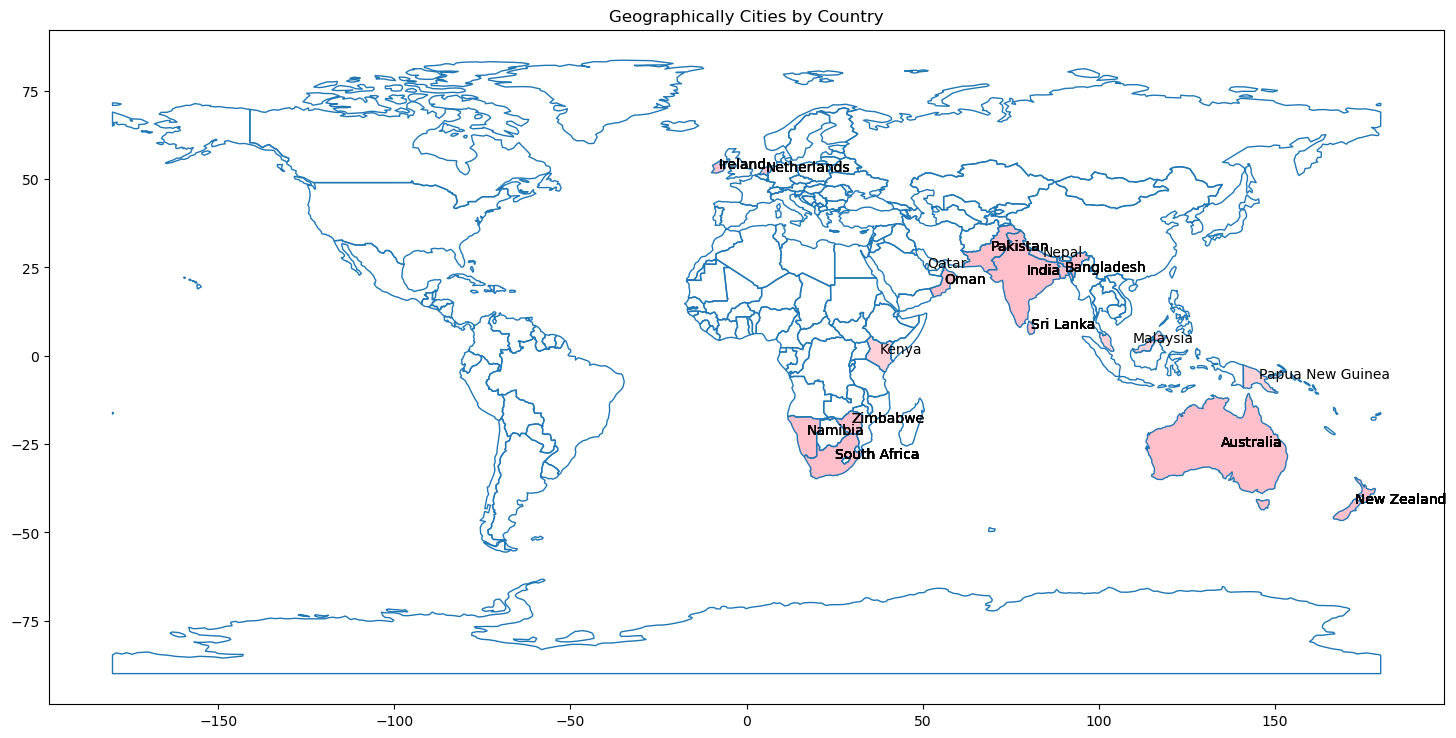

In [153]:
"""
In this create a world map  using geopandas then merging the dataframe with df_venues


 
"""
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_df = world.merge(df_venues, left_on='name', right_on='country')

# Plotting
fig, ax = plt.subplots(figsize=(18, 10))

world.boundary.plot(ax=ax, linewidth=1)
merged_df.plot(ax=ax, color='pink', alpha=0.7)

# Adding labels to each city
for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['country']):
    ax.text(x, y, label, fontsize=10)

plt.title('Geographically Cities by Country')
plt.show()

In [144]:
warnings.resetwarnings()

In [145]:
unique_cities_count = df_venues['country'].nunique()
print(f'The number of unique country in the df_venues is: {unique_cities_count}')

The number of unique country in the df_venues is: 25


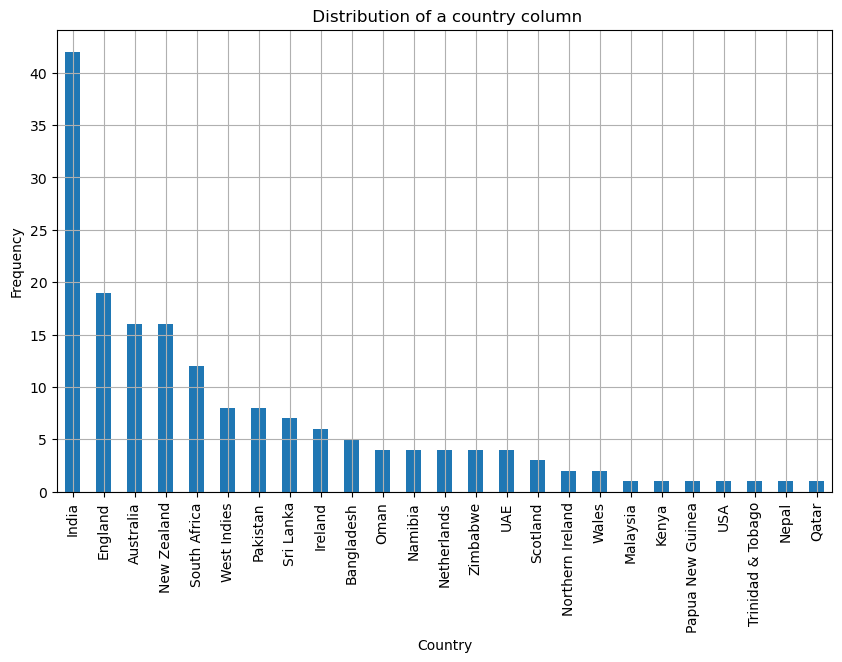

In [89]:
# distribution of a country column for understadning
plt.figure(figsize=(10, 6))
df_venues['country'].value_counts().plot(kind='bar')

plt.title(" Distribution of a country column")
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()



In [86]:
unique_cities_count = df_venues['city'].nunique()
print(f'The number of unique cities in the df_venues is: {unique_cities_count}')

The number of unique cities in the dataset is: 144


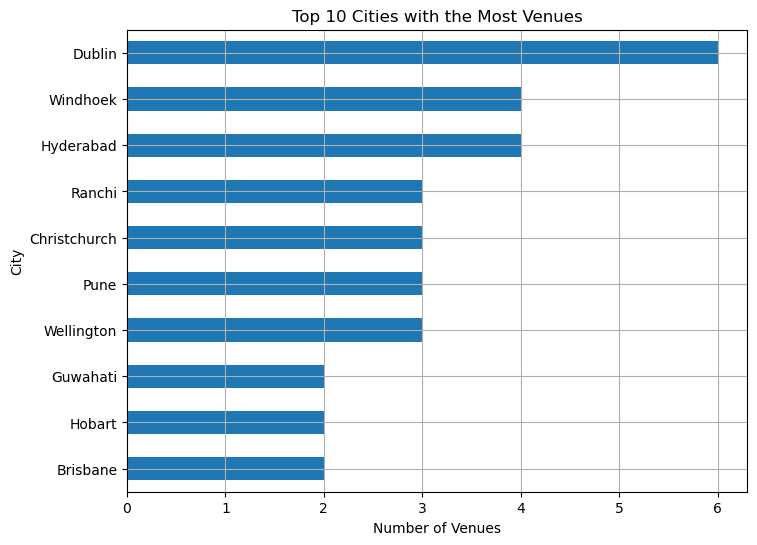

In [142]:
# Assuming 'venues_df' is your DataFrame and 'city' is the column of interest
city_counts = df_venues['city'].value_counts()

# Selecting the top 10 cities
top_cities = city_counts.head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))

top_cities.sort_values().plot(kind='barh')
plt.grid()
plt.title('Top 10 Cities with the Most Venues')
plt.xlabel('Number of Venues')
plt.ylabel('City')
plt.show()

In [ ]:
# # load the dataset
# df = pd.read_csv("titanic.csv")

# # print the first few rows of the DataFrame
# print(df.head())

# # print the DataFrame's shape
# print(df.shape)

# # print the DataFrame's data types
# print(df.dtypes)

# # check for missing values
# print(df.isnull().sum())



# # visualize the distribution of a numeric column
# plt.hist(df['Age'])
# plt.show()

# # visualize the distribution of a categorical column
# df['Sex'].value_counts().plot(kind='bar')
# plt.show()

# # calculate basic statistics for a numeric column
# print(df['Fare'].describe())

# # calculate the correlation between two numeric columns
# print(df['Fare'].corr(df['Survived']))

# # group the data by a categorical column and calculate statistics
# grouped_df = df.groupby('Pclass')['Survived'].mean()
# print(grouped_df)

# # create a scatter plot to visualize the relationship between two numeric columns
# plt.scatter(df['Age'], df['Fare'])
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.show()


In [ ]:


# # create a box plot to visualize the distribution of a numeric column
# plt.boxplot(df['Fare'])
# plt.ylabel('Fare')
# plt.show()

# # create a bar plot to visualize the mean of a numeric column for each category of a categorical column
# df.groupby('Sex')['Age'].mean().plot(kind='bar')
# plt.ylabel('Average Age')
# plt.show()

# # create a pivot table to summarize the data
# pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
# print(pivot_table)

# # create a heatmap to visualize the pivot table
# plt.pcolor(pivot_table, cmap='Reds')
# plt.colorbar()
# plt.show()

# # create a pairplot to visualize the relationships between multiple numeric columns
# import seaborn as sns
# sns.pairplot(df, vars=['Age', 'Fare', 'SibSp'])
# plt.show()

# # create a bar plot to visualize the count of a categorical column
# df['Embarked'].value_counts().plot(kind='bar')
# plt.ylabel('Count')
# plt.show()

# # create a countplot to visualize the count of a categorical column by the categories of another categorical column
# sns.countplot(x='Sex', hue='Pclass', data=df)
# plt.show()


In [ ]:

# # create a point plot to visualize the mean of a numeric column by the categories of a categorical column
# sns.pointplot(x='Sex', y='Age', data=df)
# plt.ylabel('Average Age')
# plt.show()

# # create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
# sns.violinplot(x='Sex', y='Age', data=df)
# plt.ylabel('Age')
# plt.show()

# # create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
# sns.boxplot(x='Sex', y='Age', data=df)
# plt.ylabel('Age')
# plt.show()

# # create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
# sns.swarmplot(x='Sex', y='Age', data=df)
# plt.ylabel('Age')
# plt.show()

# # create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
# g = sns.FacetGrid(df, col='Sex')
# g.map(plt.hist, 'Age')
# plt.show()

# # create a heatmap to visualize the correlation between multiple numeric columns
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
# plt.show()

In [ ]:

# # create a lag plot to check for autocorrelation in a numeric column
# from pandas.plotting import lag_plot
# lag_plot(df['Fare'])
# plt.show()

# # create an autocorrelation plot to visualize the autocorrelation in a numeric column
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(df['Fare'])
# plt.show()

# # create a scatter plot matrix to visualize the relationships between multiple numeric columns
# from pandas.plotting import scatter_matrix
# scatter_matrix(df[['Age', 'Fare', 'SibSp']], alpha=0.2, figsize=(6, 6))
# plt.show()

# # create a regression plot to visualize the relationship between two numeric columns
# sns.regplot(x='Age', y='Fare', data=df)
# plt.show()

# # create a barplot to visualize the mean of a numeric column by the categories of a categorical column
# sns.barplot(x='Sex', y='Age', data=df)
# plt.ylabel('Average Age')
# plt.show()

# # create a pointplot to visualize the mean and confidence interval of a numeric column by the categories of a categorical column
# sns.pointplot(x='Sex', y='Age', data=df, ci=95)
# plt.ylabel('Average Age')
# plt.show()

# # create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
# sns.lmplot(x='Age', y='Fare', hue='Sex', data=df)
# plt.show()



#### Outlier detection

